<a href="https://colab.research.google.com/github/Pathin220/4105_ML/blob/main/4105_Hw_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [576]:
#ECGR 4105 Homework 4
#Patrick Hinman

#necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import mean_squared_error


from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Machine Learning/cancer.csv'
Cancer_dataset = pd.DataFrame(pd.read_csv(file_path))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [577]:
#Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K).

#1. Identify the optimum number of K, principal components that achieve the highest classification accuracy.
#2. Plot your classification accuracy, precision, and recall over a different number of Ks.
#3. Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.
#4. Compare your results against the logistic regression that you have done in homework 3.

In [578]:
#Mapping the text to numbers
varlist =  ['diagnosis']
def binary_map(x):
    return x.map({'B': 0, 'M': 1})

Cancer_dataset[varlist] = Cancer_dataset[varlist].apply(binary_map)


Cancer_X = Cancer_dataset.loc[:, ~Cancer_dataset.columns.isin(['id', 'diagnosis','Unnamed: 32'])]
Cancer_Y = Cancer_dataset['diagnosis'].values



np.random.seed(0)
Cancer_X_train, Cancer_X_test, Cancer_Y_train, Cancer_Y_test = train_test_split(Cancer_X, Cancer_Y, train_size = 0.8, test_size = 0.2, random_state = 100)


In [579]:
#Scalar normalization
scalerMin = MinMaxScaler()
scalerStandard = StandardScaler()


#Min Max or Standard normalize
Cancer_X_train = scalerMin.fit_transform(Cancer_X_train)
Cancer_X_test = scalerMin.fit_transform(Cancer_X_test)



PCA_cancer_results=pd.DataFrame(columns=['K','Accuracy','Precision','Recall'])
SVM_C_accuracy=pd.DataFrame(columns=['K','Linear Accuracy','RBF Accuracy','Poly Accuracy'])

In [580]:
K=30
arange=np.arange(1,K)


for i in arange:
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(Cancer_X_train)
    principalComponents_t = pca.fit_transform(Cancer_X_test)

    #Fit Regression model
    SVM_C_rbf = SVC(kernel='rbf', C=1e3, gamma=0.1)
    SVM_C_lin = SVC(kernel='linear', C=1e3)
    SVM_C_poly = SVC(kernel='poly', C=1e3, degree=2)


    Cancer_Y_pred_rbf = SVM_C_rbf.fit(principalComponents, Cancer_Y_train).predict(principalComponents_t)
    Cancer_Y_pred = SVM_C_lin.fit(principalComponents, Cancer_Y_train).predict(principalComponents_t)
    Cancer_Y_pred_poly = SVM_C_poly.fit(principalComponents, Cancer_Y_train).predict(principalComponents_t)


    Accuracy = metrics.accuracy_score(Cancer_Y_test, Cancer_Y_pred)
    Accuracy_rbf = metrics.accuracy_score(Cancer_Y_test, Cancer_Y_pred_rbf)
    Accuracy_poly = metrics.accuracy_score(Cancer_Y_test, Cancer_Y_pred_poly)

    Accuracy = metrics.accuracy_score(Cancer_Y_test, Cancer_Y_pred)
    Precision = metrics.precision_score(Cancer_Y_test, Cancer_Y_pred)
    Recall = metrics.recall_score(Cancer_Y_test, Cancer_Y_pred)


    Cancer_data= {'K':i,'Accuracy':Accuracy,'Precision':Precision,'Recall': Recall}
    Kernal_data= {'K':i,'Linear Accuracy':Accuracy,'RBF Accuracy':Accuracy_rbf,'Poly Accuracy':Accuracy_poly}

    Append_data = pd.DataFrame(data = Cancer_data, index=[i])
    Accuracy_data = pd.DataFrame(data = Kernal_data, index=[i])
    PCA_cancer_results=pd.concat([PCA_cancer_results, Append_data])
    SVM_C_accuracy=pd.concat([SVM_C_accuracy,Accuracy_data])



Text(0, 0.5, 'Stat Value')

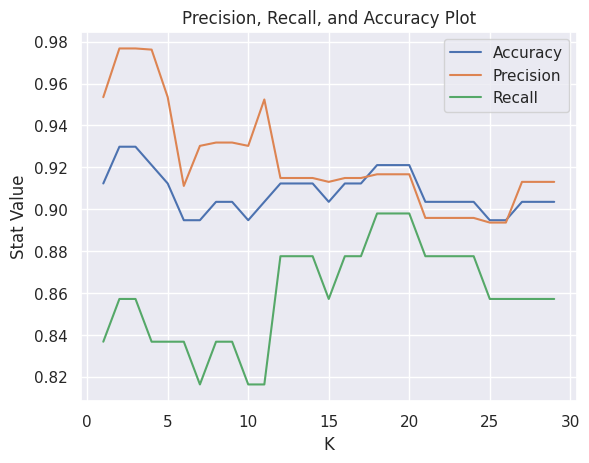

In [581]:
#Plotting data
fig1, ax = plt.subplots()
ax.plot(PCA_cancer_results['Accuracy'])
ax.plot(PCA_cancer_results['Precision'])
ax.plot(PCA_cancer_results['Recall'])
ax.legend(['Accuracy','Precision','Recall'])
ax.set_title('Precision, Recall, and Accuracy Plot')
ax.set_xlabel('K')
ax.set_ylabel('Stat Value')




Text(0, 0.5, 'Stat Value')

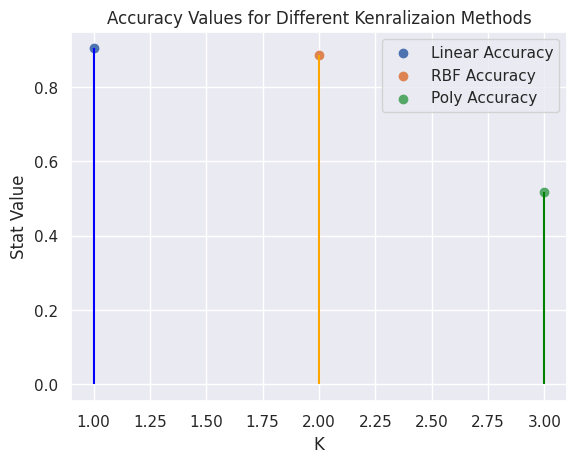

In [582]:
#Plotting data
fig1, ax = plt.subplots()

plt.scatter(1, Accuracy, label = 'Linear Accuracy')
plt.scatter(2, Accuracy_rbf , label = 'RBF Accuracy')
plt.scatter(3, Accuracy_poly , label = 'Poly Accuracy')

line_colors = ['blue', 'orange', 'green']
for x, y, color in zip([1, 2, 3], [Accuracy, Accuracy_rbf, Accuracy_poly], line_colors):
    plt.vlines(x, 0, y, colors=color, linestyles='-', alpha=1)

ax.legend(['Linear Accuracy','RBF Accuracy','Poly Accuracy'])
ax.set_title('Accuracy Values for Different Kenralizaion Methods')
ax.set_xlabel('K')
ax.set_ylabel('Stat Value')


In [583]:
#Problem 2
#Develop a SVR regression model that predicts housing price based on the following input variables:

#Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

#Plot your regression model for SVR similar to the sample code provided on Canvas.
#Compare your results against linear regression with regularization loss that you already did in homework1.
#Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest regression accuracy.
#Explore different kernel tricks to capture non-linearities within your data. Plot the results and compare the accuracies for different kernels.

In [584]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Machine Learning/Housing.csv'
housing_data = pd.DataFrame(pd.read_csv(file_path))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [585]:
#Mapping the text to numbers
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing_data[varlist] = housing_data[varlist].apply(binary_map)

In [586]:
#Split data into training and validation
np.random.seed(0)
df_train, df_test = train_test_split(housing_data, train_size = 0.8, test_size = 0.2, random_state = 100)

In [587]:
#Separate X inputs and Y inputs
X_Vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']

Y_train = np.array(df_train['price'])
X_train = df_train[X_Vars]

Y_test = np.array(df_test['price'])
X_test = df_test[X_Vars]

In [588]:
svc_housing_MSE=pd.DataFrame(columns=['K','Linear MSE'])



In [589]:
K=11
arange=np.arange(1,K)
for i in arange:
    pca = PCA(n_components=i)
    Principalcomponents = pca.fit_transform(X_train)
    Principalcomponents_t = pca.fit_transform(X_test)

    # Fit regression model
    svr_lin = SVR(kernel='linear', C=10, cache_size=10000)

    Y_fit = svr_lin.fit(Principalcomponents, Y_train)
    Y_pred = Y_fit.predict(Principalcomponents_t)

    MSE = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))

    kernal_data= {'K':i,'Linear MSE':MSE}
    MSE_data = pd.DataFrame(data=kernal_data,index=[i])
    svc_housing_MSE=pd.concat([svc_housing_MSE,MSE_data])

In [590]:
svc_kernal_MSE=pd.DataFrame(columns=['K','Linear MSE','RBF MSE','Poly MSE'])

SVR_rbf = SVR(kernel='rbf', C=10, gamma=0.1)
SVR_lin = SVR(kernel='linear', C=10,cache_size=10000)
SVR_poly = SVR(kernel='poly', C=10, degree=2)

In [591]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)

In [592]:
K=11
arange=np.arange(1,K)
for i in arange:
    pca = PCA(n_components=i)
    Principalcomponents = pca.fit_transform(X_train)
    Principalcomponents_t = pca.fit_transform(X_test)

    # Fit regression model
    Y_fit = SVR_lin.fit(Principalcomponents, Y_train)
    Y_pred = Y_fit.predict(Principalcomponents_t)
    Y_pred_rbf = SVR_rbf.fit(Principalcomponents, Y_train).predict(Principalcomponents_t)
    Y_pred_poly = SVR_poly.fit(Principalcomponents, Y_train).predict(Principalcomponents_t)

    #Calculate RMSE
    MSE = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
    MSE_rbf = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_rbf))
    MSE_poly = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_poly))

    kernal_data= {'K':i,'Linear MSE':RMSE,'RBF MSE':MSE_rbf,'Poly MSE':MSE_poly}
    MSE_data = pd.DataFrame(data=kernal_data,index=[i])
    svc_kernal_RMSE=pd.concat([svc_kernal_MSE, MSE_data])

Text(28.0, 0.5, 'Stat Value')

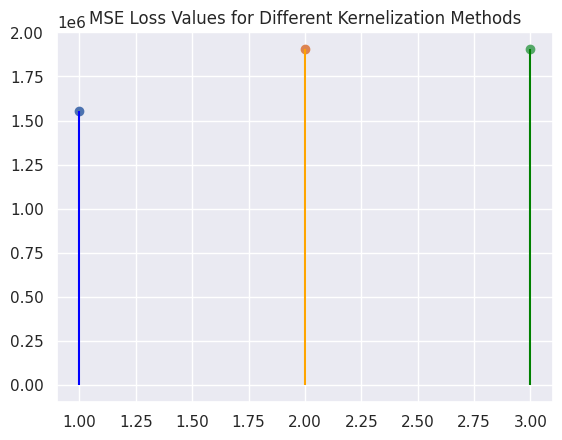

In [593]:
# Plotting MSE Losses for the different kernelization methods
plt.scatter(1, MSE, label ='Linear MSE')
plt.scatter(2, MSE_rbf, label ='RBF MSE')
plt.scatter(3, MSE_poly, label ='Poly MSE')

line_colors = ['blue', 'orange', 'green']

# Add vertical lines
for x, y, color in zip([1, 2, 3], [MSE, MSE_rbf, MSE_poly], line_colors):
    plt.vlines(x, 0, y, colors=color, linestyles='-', alpha=1)

plt.title("MSE Loss Values for Different Kernelization Methods")
ax.set_xlabel('K')
ax.set_ylabel('Stat Value')